<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [152]:
#@title Current Date
Today = '2021-10-11' #@param {type:"date"}


In [ ]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
#@markdown ---

In [ ]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = Draft #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [80]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [81]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [83]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [84]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
!pip install gpy

In [86]:
import seaborn as sns
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

In [146]:
Path = '/content/drive/My Drive/Data/ET5003_Etivity_3/'

train_data = Path + 'HousePrice_Train.csv'
test_data = Path + 'HousePrice_Test.csv'

# We don't need the sample submission, this needs to be created from model predictions, keeping it just for reference
#sample_submission = Path + 'sample_submission.csv'

In [147]:
# train data
df_train = pd.read_csv(train_data)
print("Training dataset shape : ",df_train.shape)

# test data
df_test = pd.read_csv(test_data)
print("Test dataset shape : ",df_test.shape)

# sample submission example
# df_sample = pd.read_csv(sample_submission)
# print("Sample_Submission dataset shape : ",df_sample.shape) 

Training dataset shape :  (1638, 14)
Test dataset shape :  (702, 13)


In [148]:
df_train.isna().sum()
#df_test.isna().sum()

Index               0
ID                  0
Location            0
Num_Bathrooms       0
Num_Beds            0
BER_class         251
Description         0
Services         1061
Features            0
Latitude            0
Longitude           0
Type                0
Surface             0
Price               0
dtype: int64

In [149]:
df_train.set_index('Index',inplace=True)
df_test.set_index('Index',inplace=True)

In [150]:
df_train.head(6)

,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
Index,,,,,,,,,,,,,
1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000
2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000
6,12225979,Glasnevin,1,3,E1,Property Team Lappin Estates take great pleasu...,NaN,None,53.380367,-6.279310,terraced,140.00,360000


In [151]:
df_test.head()

,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
Index,,,,,,,,,,,,
1639,12292473,Milltown,2,2,C2,OMD Estate Agents are delighted to present thi...,"Parking,Oil Fired Central Heating",Designated parking spaces\nPresented in pristi...,53.316269,-6.243391,townhouse,65.0
1640,12314667,Glasnevin,2,5,E1,Welcome to Saint Anthony No.214 Glasnevin Aven...,"Parking,Gas Fired Central Heating",Modern Worcester Gas Boiler\nSingle Glazed Win...,53.390769,-6.281936,semi-detached,142.0
1641,11699240,Dalkey,1,2,G,"Located in this ever popular road, on grounds ...",NaN,2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,53.272486,-6.108675,detached,80.0
1642,12416984,Raheny,4,4,A2,DNG are delighted to represent the sale of thi...,"Parking,Alarm",Detached House\nSouth Facing Garden\nOff Stree...,53.376932,-6.185334,detached,209.0
1643,12383407,Crumlin,2,3,F,A unique opportunity to acquire this red brick...,"Parking,Gas Fired Central Heating,Alarm",Red brick end of terrace property \nC. 108sqm ...,53.327208,-6.308938,end-of-terrace,108.0


In [152]:
df_train.dtypes

ID                 int64
Location          object
Num_Bathrooms      int64
Num_Beds           int64
BER_class         object
Description       object
Services          object
Features          object
Latitude         float64
Longitude        float64
Type              object
Surface          float64
Price              int64
dtype: object

In [153]:
df_train.describe()
#df_test.describe()

,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface,Price
count,1.638000e+03,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1.638000e+03
mean,1.231930e+07,2.054335,3.043346,53.350473,-6.255086,169.540695,5.547196e+05
std,1.447540e+05,1.241259,1.379650,0.076832,0.144430,1791.793934,5.652032e+05
min,1.118567e+07,1.000000,1.000000,52.501856,-6.497000,3.400000,1.999500e+04
25%,1.228104e+07,1.000000,2.000000,53.294261,-6.309613,73.000000,2.950000e+05
50%,1.238055e+07,2.000000,3.000000,53.341386,-6.247780,97.050000,3.950000e+05
75%,1.240548e+07,3.000000,4.000000,53.382031,-6.193982,135.000000,5.950000e+05
max,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,72236.387140,8.900000e+06


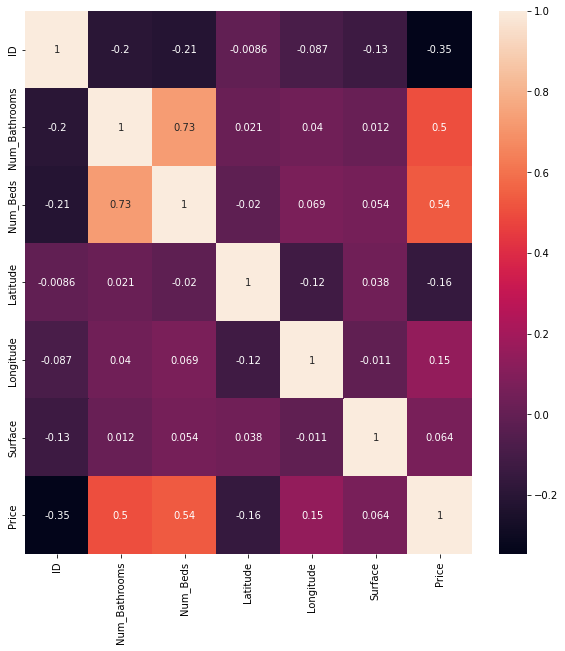

In [154]:
plt.figure(figsize = (10,10))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

In [155]:
# sns.pairplot(df_train)
# plt.show()
# sns.pairplot(df_test)
# plt.show()

Some of the numberical features contain outliers which I will remove to make the training data evenly distributed

In [156]:
# Removing numerical outliers
def remove_outliers(df_train, num_columns, threshold = 1.5):
 
  for i,col in enumerate(num_columns):
     
     q1 = df_train[col].quantile(0.25)
     q3 = df_train[col].quantile(0.75)
     iqr = q3 - q1     
     df_no_outlier = df_train[(df_train[col] > q1 - threshold*iqr ) & (df_train[col] < q3 + threshold*iqr)]
  return df_no_outlier

In [157]:
num_columns = ['Num_Bathrooms','Num_Beds','Surface']
df_train = remove_outliers(df_train,num_columns)

In [158]:
df_train[(df_train['Latitude']<53) | (df_train['Longitude']>-4)]

,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
Index,,,,,,,,,,,,,
356,12270559,Clondalkin,1,3,NaN,RAY COOKE AUCTIONEERS take great pleasure in i...,NaN,None,52.501856,-1.744995,semi-detached,79.0,199000


Looking at the earlier pairplots, there is one outlier for both Latitude and Longitude.       
After investigating further, the  co-ordinates are for an address in Birmingham,UK, so I will drop this example

In [159]:
df_train.drop(index=355,axis=1,inplace=True)


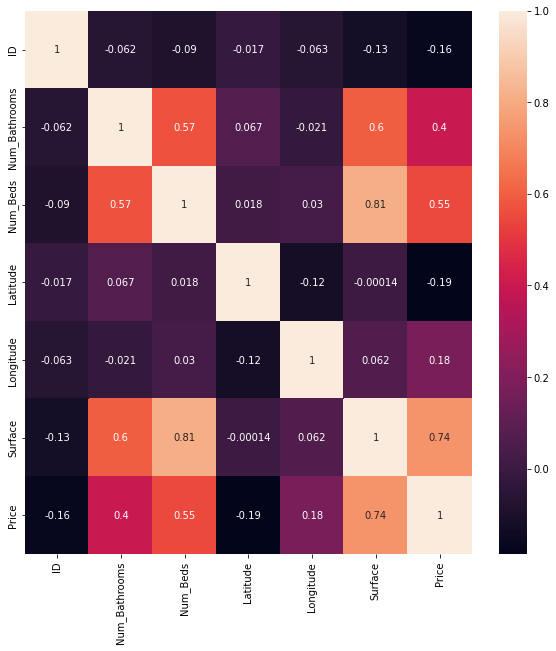

In [160]:
plt.figure(figsize = (10,10))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

# sns.pairplot(df_train)
# plt.show()


## Cathegorical variables

In [161]:
ber_mapper = {
    'A1':1,'A2':2,'A3':3,
    'B1':4,'B2':5,'B3':6,
    'C1':7,'C2':8,'C3':9,
    'D1':10,'D2':11,
    'E1':12,'E2':13,
    'F':14,
    'G':15,
    'SINo666of2006exempt':16,
    np.nan:17
}

df_train['BER_class'] = df_train['BER_class'].replace(ber_mapper)
df_test['BER_class'] = df_test['BER_class'].replace(ber_mapper)

In [162]:
df_train = pd.get_dummies(df_train, columns=['Type'], drop_first=False)
df_test = pd.get_dummies(df_test, columns=['Type'], drop_first=False)

As `BER_Class` is an ordinal cathegorical variable I have decided to encode with the use of the mapper above. I have inputed NaN values with the last class, however I may revisit this decision. It might be worthwhile to impute a value for one of the existing BER ratings.      
`Property_type` has been one hot encoded as this is not an ordianl variable.
  

In [163]:
#df_train.isna().sum()
#df_test.isna().sum()

In [164]:
df_train.columns

Index(['ID', 'Location', 'Num_Bathrooms', 'Num_Beds', 'BER_class',
       'Description', 'Services', 'Features', 'Latitude', 'Longitude',
       'Surface', 'Price', 'Type_apartment', 'Type_bungalow', 'Type_detached',
       'Type_duplex', 'Type_end-of-terrace', 'Type_semi-detached', 'Type_site',
       'Type_studio', 'Type_terraced', 'Type_townhouse'],
      dtype='object')

In [165]:
df_test.columns

Index(['ID', 'Location', 'Num_Bathrooms', 'Num_Beds', 'BER_class',
       'Description', 'Services', 'Features', 'Latitude', 'Longitude',
       'Surface', 'Type_apartment', 'Type_bungalow', 'Type_detached',
       'Type_duplex', 'Type_end-of-terrace', 'Type_semi-detached', 'Type_site',
       'Type_terraced', 'Type_townhouse'],
      dtype='object')

In [166]:
df_train

,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Surface,Price,Type_apartment,Type_bungalow,Type_detached,Type_duplex,Type_end-of-terrace,Type_semi-detached,Type_site,Type_studio,Type_terraced,Type_townhouse
Index,,,,,,,,,,,,,,,,,,,,,,
1,12409116,Ongar,2,2,9,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,67.00,195000,1,0,0,0,0,0,0,0,0,0
2,12320330,North Strand,1,2,10,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,95.97,425000,0,0,0,0,0,0,0,0,1,0
3,12405953,Stepaside,3,3,3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,107.00,535000,0,0,0,0,0,1,0,0,0,0
4,12202582,Cabinteely,1,3,12,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,81.00,499000,0,0,1,0,0,0,0,0,0,0
5,12299336,Lusk,3,4,10,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,153.00,510000,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633,12381830,Harold's Cross,1,1,10,PROPERTY PARTNERS OBRIEN SWAINE are proud to o...,NaN,None,53.325479,-6.277781,37.00,220000,1,0,0,0,0,0,0,0,0,0
1634,12424903,Blackrock,1,2,8,Built in c.1930 38 Stradbrook Road is a deligh...,"Parking,Gas Fired Central Heating,Alarm,Wheelc...",Extremely convenient location \nWheelchair acc...,53.292767,-6.166668,64.00,500000,0,1,0,0,0,0,0,0,0,0
1635,12383142,Blackrock,3,5,7,An impressive three-story family home superbly...,NaN,Gas fired central heating with underfloor heat...,53.284975,-6.178685,175.96,795000,0,0,1,0,0,0,0,0,0,0


In [167]:
df_cost = df_train['Price']
df_train.drop(['ID','Location','Price'],axis=1,inplace=True)
df_test.drop(['ID','Location'],axis=1, inplace=True)
df_test.head()

,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Surface,Type_apartment,Type_bungalow,Type_detached,Type_duplex,Type_end-of-terrace,Type_semi-detached,Type_site,Type_terraced,Type_townhouse
Index,,,,,,,,,,,,,,,,,,
1639,2,2,8,OMD Estate Agents are delighted to present thi...,"Parking,Oil Fired Central Heating",Designated parking spaces\nPresented in pristi...,53.316269,-6.243391,65.0,0,0,0,0,0,0,0,0,1
1640,2,5,12,Welcome to Saint Anthony No.214 Glasnevin Aven...,"Parking,Gas Fired Central Heating",Modern Worcester Gas Boiler\nSingle Glazed Win...,53.390769,-6.281936,142.0,0,0,0,0,0,1,0,0,0
1641,1,2,15,"Located in this ever popular road, on grounds ...",NaN,2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,53.272486,-6.108675,80.0,0,0,1,0,0,0,0,0,0
1642,4,4,2,DNG are delighted to represent the sale of thi...,"Parking,Alarm",Detached House\nSouth Facing Garden\nOff Stree...,53.376932,-6.185334,209.0,0,0,1,0,0,0,0,0,0
1643,2,3,14,A unique opportunity to acquire this red brick...,"Parking,Gas Fired Central Heating,Alarm",Red brick end of terrace property \nC. 108sqm ...,53.327208,-6.308938,108.0,0,0,0,0,1,0,0,0,0


## Training & Test Data

In [ ]:
# # split data into training and test
# from sklearn.model_selection import train_test_split

# # training: 70% (0.7), test: 30% (0.3) 
# # you could try any other combination 
# # but consider 50% of training as the low boundary
# X_train,X_test,y_train,y_test = train_test_split(df_train.drop('Price',axis=1), df_train['Price'], test_size=0.3)

### Train dataset

In [ ]:
# # training dataset: 
# training_file = syntPath+filename1
# # test dataset: 
# testing_file = syntPath+filename2
# # cost dataset: 
# cost_file = syntPath+filename3

In [ ]:
# show first data frame rows 
# dftrain.head()

In [ ]:
# Generate descriptive statistics
# dftrain.describe()

### Test dataset

In [ ]:
# show first data frame rows 
# dftest.head()

In [ ]:
# Generate descriptive statistics
# dftest.describe()

### Expected Cost dataset

In [ ]:
# # Generate descriptive statistics
# dfcost.describe()

# NATURAL LANGUAGE PROCESSING

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

Your comments, explanation, and references here.

In [ ]:
# df_train_text = df_train.drop(['Index', 'ID', 'Location', 'Num_Bathrooms', 'Num_Beds', 'BER_class',
#        'Latitude', 'Longitude','Surface', 'Price', 'Type_bungalow', 'Type_detached', 'Type_duplex',
#        'Type_end-of-terrace', 'Type_semi-detached', 'Type_site', 'Type_studio',
#        'Type_terraced', 'Type_townhouse'],axis = 'columns')
# df_train_text
# df_test_text = df_train.drop(['Index', 'ID', 'Location', 'Num_Bathrooms', 'Num_Beds', 'BER_class',
#        'Latitude', 'Longitude','Surface','Type_bungalow', 'Type_detached', 'Type_duplex',
#        'Type_end-of-terrace', 'Type_semi-detached', 'Type_site', 'Type_studio',
#        'Type_terraced', 'Type_townhouse'],axis = 'columns')
# df_test_text


### NLP of Text data

In [168]:
nlp_features = ["Description","Services", "Features"] 
df_train_text =df_train[nlp_features]
df_train_text.head()

,Description,Services,Features
Index,,,
1,DNG are delighted to present to the market no....,NaN,None
2,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...
3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...
4,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...
5,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...


In [170]:
df_train_text.isna().sum()

Description      0
Services       966
Features         0
dtype: int64

In [171]:
def nlp_tasks(data, min_chars = 3):
  """
  Function performing all the NLP pre-processing tasks to an Pandas DataFrame
  Tasks are as follows:
  1.Remove all characters which are not letters
  2.Remove all short words under a lenght defined by min_chars 
  3.Convert everything to lower case
  4.Tokenization of all words
  5.Remove all stop words 
  6.De-tokenization 

  Args:
  data: Pandas Dataframe containing object or text only features
  min_chars: Integer defining the minimun length of words to retained, default = 3

  Returns:
  Pandas DataFrame after applying the NLP preprocessing tasks
  
  """

  # I will replace all NaN with an empty string to make it the data easier to process
  data.replace(np.nan, "", inplace=True)

  for col in data.columns:
    text_list = data[col].tolist()
    text_df = pd.DataFrame({col : text_list})

    # removing everything except letters
    text_df[col] = text_df[col].str.replace("[^a-zA-Z#]", " ")

    # removing short words, this is user defined by the variable min_chars
    text_df[col] = text_df[col].apply(lambda x: ' '.join([w for w in x.split() if len(w)>min_chars]))

    # make all text lowercase
    text_df[col] = text_df[col].apply(lambda x: x.lower())
    
    # tokenization
    tokenized_doc = text_df[col].apply(lambda x: x.split())
    # remove stop-words
    tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
    
    # de-tokenization
    detokenized_doc = []
    for i in range(len(text_df)):
      t = ' '.join(tokenized_doc[i])
      detokenized_doc.append(t)
    
    data[col] = detokenized_doc
    
  return data

In [172]:
df_train_txt_clean = nlp_tasks(df_train_text)
df_train_txt_clean.isna().sum()

Description    0
Services       0
Features       0
dtype: int64

In [173]:
df_train_txt_clean.head()

,Description,Services,Features
Index,,,
1,delighted present market chipping bedroom apar...,,none
2,northbrook terrace charming brick period home ...,,bight spacious interior numerous original feat...
3,welcome cotter close immaculately presented th...,,special features large rear garden generous st...
4,welcome sycamore walk enjoying premier address...,,wonderful detached bungalow accommodation exte...
5,four seasons comes market wonderful opportunit...,,detached property double glazed windows double...


##### TF-IDF Vectorization

In [174]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (1,2),  max_df=0.5, smooth_idf=True) #max_features= 300,
print(vectorizer)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.5, max_features=None,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)


In [175]:
X1 = vectorizer.fit_transform(df_train_txt_clean['Description'])
X2 = vectorizer.fit_transform(df_train_txt_clean['Services'])
X3 = vectorizer.fit_transform(df_train_txt_clean['Features'])



In [176]:
from scipy.sparse import hstack


In [177]:
X_all =hstack((X1,X2,X3),format='csr')
#X1.shape
#X2.shape
#X3.shape
X_all.shape

(1515, 114506)

In [179]:
y = df_cost
y.shape

(1515,)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size = 0.20, random_state = 0)

Training the classifier and making predictions on the test set

In [47]:
from sklearn.linear_model import LogisticRegression as LogReg

LR = LogReg()
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
# testing the model

prediction_train = LR.predict(X_train)
#print('training prediction\t', prediction_train)

prediction_test = LR.predict(X_test)
#print('test prediction\t\t', prediction_test)

test prediction		 [325000 395000 325000 395000 350000 395000 395000 395000 250000 475000
 395000 260000 260000 475000 350000 325000 375000 375000 325000 395000
 350000 450000 350000 325000 325000 395000 325000 450000 795000 350000
 395000 395000 350000 395000 375000 395000 475000 260000 395000 395000
 395000 325000 375000 395000 395000 395000 325000 260000 495000 395000
 350000 395000 260000 395000 350000 395000 375000 395000 260000 350000
 475000 325000 250000 350000 325000 375000 450000 395000 495000 325000
 395000 250000 350000 395000 325000 350000 395000 375000 395000 250000
 425000 475000 350000 350000 395000 450000 375000 260000 395000 350000
 395000 350000 325000 325000 395000 395000 375000 395000 395000 450000
 250000 350000 350000 395000 395000 350000 395000 250000 495000 450000
 375000 375000 395000 395000 395000 395000 450000 395000 395000 250000
 395000 395000 375000 395000 375000 295000 295000 325000 425000 375000
 350000 475000 395000 350000 375000 395000 375000 260000 25

In [53]:
from  sklearn.metrics import mean_squared_error, mean_absolute_error


In [56]:
# accuracy in training set
y_pred_train = prediction_train
print("Train Accuracy: ", mean_absolute_error(y_train, y_pred_train))

Train Accuracy:  77376.73679867986


In [57]:
# accuracy in test set (unseen data)
y_true = y_test
y_pred_test = prediction_test
print("Test Accuracy: ", mean_absolute_error(y_true, y_pred_test))

Test Accuracy:  158386.4686468647


In [185]:
#####################################################################################################################################################################################################################
#####################################################################################################################################################################################################################

In [220]:
from nltk import ngrams
k=2
bigrams = ngrams(df_train_txt_clean['Features'], k) # k = n

In [235]:
def find_ngrams(data, k=2):
  n_gram = []
  for feat in data:
    for example in feat:
      n_gram = str(ngrams(feat.split(),k))

  return n_gram

In [236]:
# for value in bigrams:
#   print(value)

grams = find_ngrams(df_train_txt_clean)

In [256]:
from nltk.util import ngrams
def ngramconvert(df,n=3):
    df_new = pd.DataFrame()
    for item in df.columns:
        df_new['new'+item]=df[item].apply(lambda sentence: list(ngrams(sentence.split(), n)))
    return df_new

In [255]:
df_train_txt_clean.columns

Index(['Description', 'Services', 'Features', 'newDescription'], dtype='object')

In [198]:
from nltk.util import ngrams

def get_n_grams(processed_docs):
  """
  Getting uni- bi-, and tri-grams from text.
  By default creates grams for entire corpus of text.
  Returns dictionary with {gram_name: gram}
  """
  # initializing list for tokens from entire corpus- all docs
  total_doc = []
  for doc in processed_docs:
      total_doc.extend(doc)    # extracting n-grams
  unigrams = ngrams(total_doc, 1)
  bigrams = ngrams(total_doc, 2)
  trigrams = ngrams(total_doc, 3)    # getting dictionary of all n-grams for corpus
  gram_dict = {
      "Unigram": unigrams,
      "Bigram": bigrams,
      "Trigram":trigrams}
      
  return unigrams, bigrams, trigrams

In [208]:
df_unigrams, df_bigrams, df_trigrams = get_n_grams(df_train_txt_clean)

In [215]:
#df_ngrams.keys()

# for key,value in df_unigrams.keys():
#   print(key)
df_unigrams

'Unigram'

In [207]:
# for key,value in df_ngrams['Unigram']:#.items():
#   print(key, value)
df_ngrams['Unigram']
  

<generator object ngrams at 0x7fcde85268d0>


# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

Your comments, explanation, and references here.

In [ ]:
# your code here

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

In [ ]:
# your code here

# SUMMARY

Your summary here.